# EDA para el dataset de mapa de conectividad

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
mapa = 'C:/PI2/datasets/mapa_conectividad.xlsx'
mapa_conectividad = pd.read_excel(mapa, sheet_name='Hoja3')

## Cargar los datos de la hoja 3

## Simplificamos la data para centrarnos en la conectividad por provincias

In [3]:
connectivity_data = mapa_conectividad[['Provincia', 'ADSL', 'Cablemódem', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía Fija', '3G', '4G']]
connectivity_data = connectivity_data.replace({'SI': 1, '--': 0})  # se convierte indicadores a valores numericos
connectivity_summary = connectivity_data.groupby('Provincia').sum()

C:\Users\venta\AppData\Local\Temp\ipykernel_38856\386529938.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  connectivity_data = connectivity_data.replace({'SI': 1, '--': 0})  # se convierte indicadores a valores numericos


In [4]:
connectivity_summary['Total'] = connectivity_summary.sum(axis=1)

In [5]:
print(connectivity_summary['Total'].head())


Provincia
BUENOS AIRES    3593
CABA             384
CATAMARCA        233
CHACO            332
CHUBUT           245
Name: Total, dtype: int64


In [6]:
connectivity_summary['Total'] = connectivity_summary['Total'].abs()


## Conectividad total por conectividad

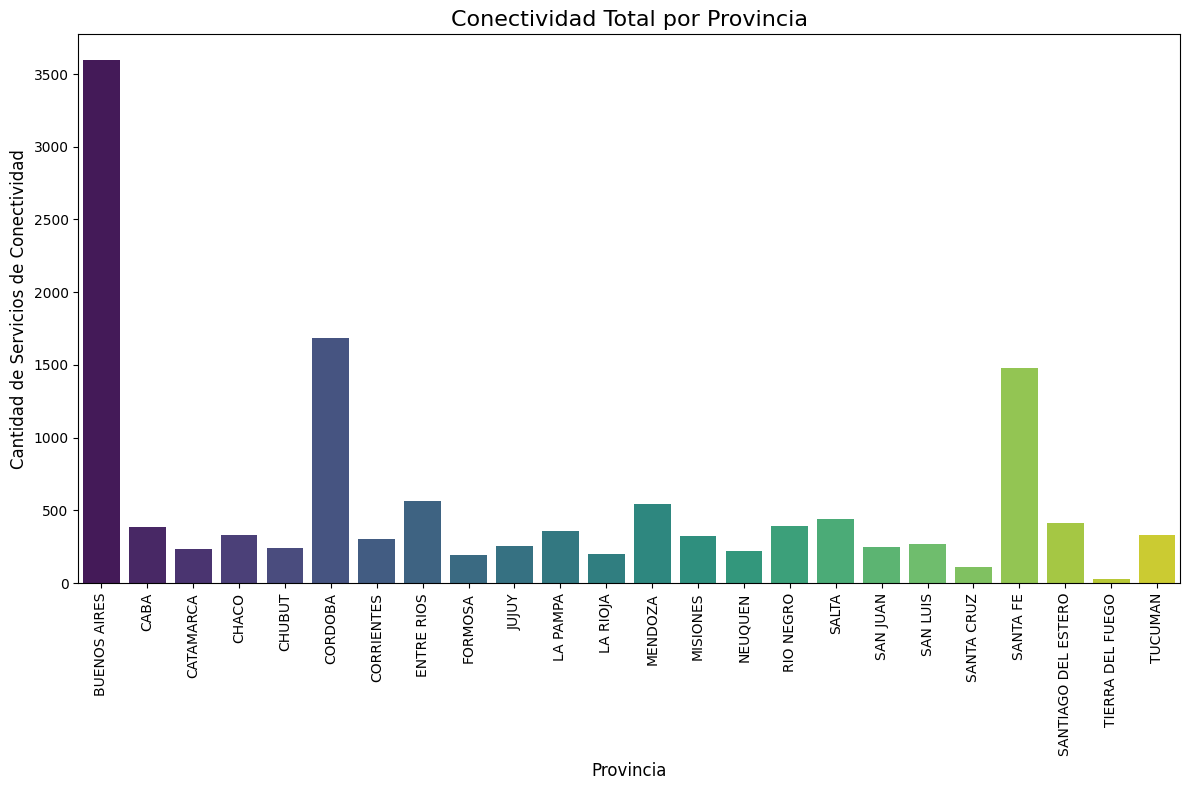

In [7]:
plt.figure(figsize=(12, 8))
sns.barplot(x=connectivity_summary.index, y=connectivity_summary['Total'], hue=connectivity_summary.index, dodge=False, palette='viridis', legend=False)
plt.title('Conectividad Total por Provincia', fontsize=16)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Cantidad de Servicios de Conectividad', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Puntos sobresalientes
## 1. Conectividad total por provincia 
Esta grafica muestra el **total de servicios de conectividad disponibles en cada provincia**, sumando los distintos tipos de conexiones: ADSL, Cablemodem, Fibra optica, satelital y wireless.
Ademas permite comparar que provincias tienen mas servicios de conectividad disponibles en terminos absolutos. Si una barra es mas alta, indica que esa provincia tiene mas infraestructura o servicios de telecomunicaciones instalados.


## Tipo de conectividad por provincia

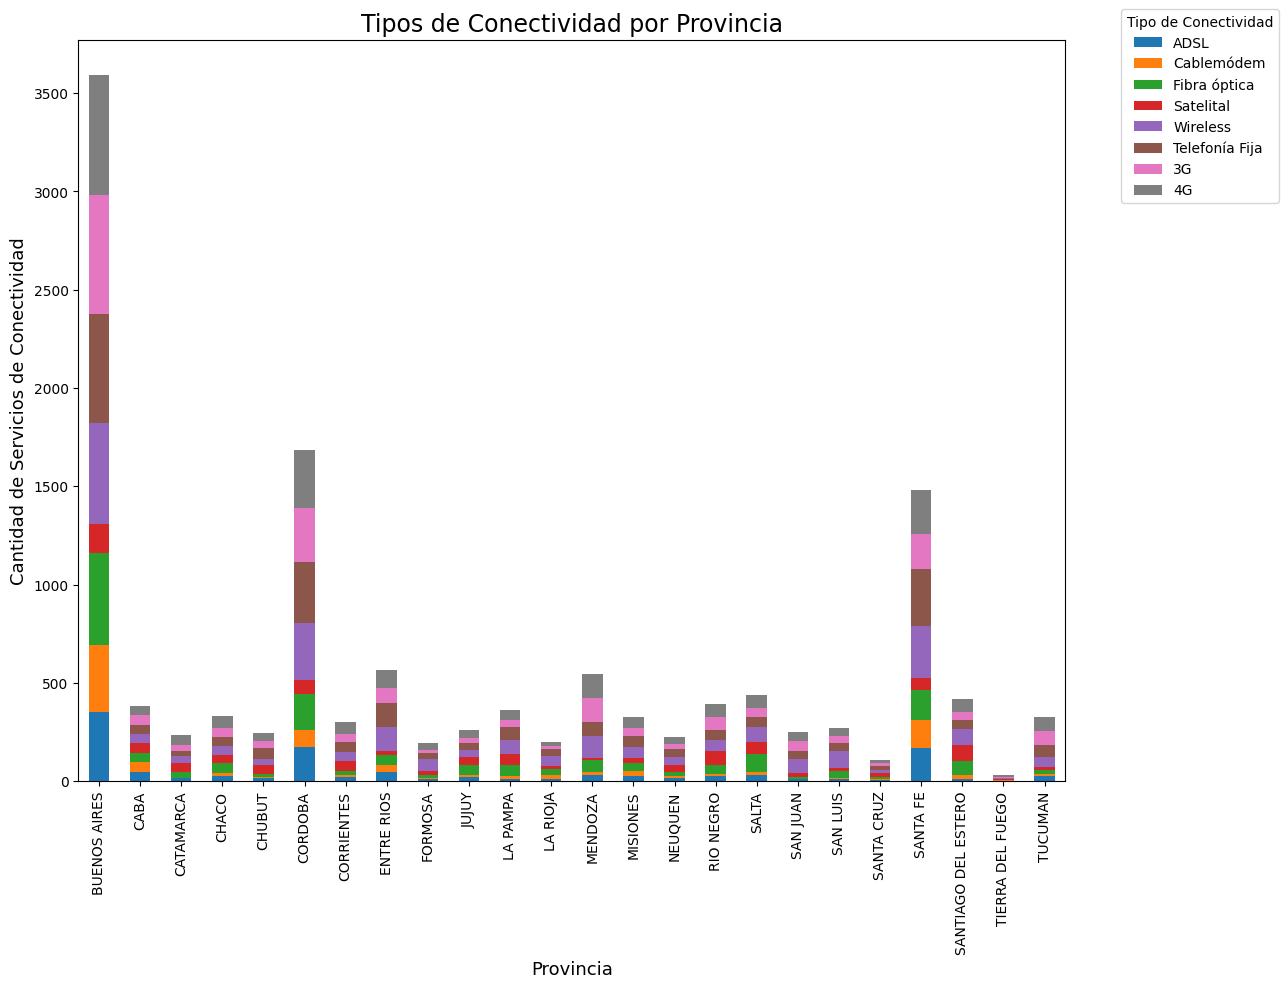

In [8]:
connectivity_summary.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(13, 10))
plt.title('Tipos de Conectividad por Provincia', fontsize=17)
plt.xlabel('Provincia', fontsize=13)
plt.ylabel('Cantidad de Servicios de Conectividad', fontsize=13)
plt.xticks(rotation=90)
plt.legend(title='Tipo de Conectividad', bbox_to_anchor=(1.05, 1.05), loc='upper left')
plt.tight_layout()
plt.show()


## Tipos de conectividad por provincia
Mostramos un grafico de barras apiladas de desglosa la cantidad de cadad tipo de servicio de conectividad en cada provincia, cada colo representa un tipo en espeficio de conectividad.
Nos permite observar que tipos de conexiones son mas comunes en cada provincia.

Por ejemplo: 
- Provincias con barras dominadas por un solo color muestran que dependen en gran medida de un solo tipo de servicio (como Wireless).
- Provincias con barras más equilibradas tienen una distribución diversa de tipos de conectividad. 


Esto tambien nos ayuda a realizar una toma de decisiones estrategicas, como dar prioridad a inversiones en infraestructura en provincias con menor conectividad.

# Distribucion geografica de acuerdo a la conectividad por provincia

## Crear un GeoDataFrame para las localidades


In [9]:
import geopandas as gpd
from shapely.geometry import Point

### Crear un GeoDataFrame para las localidades

In [10]:
file_path = 'C:/PI2/datasets/mapa_conectividad.xlsx'
sheet_data = pd.read_excel(file_path, sheet_name='Hoja3')

In [11]:
sheet_data['geometry'] = [Point(xy) for xy in zip(sheet_data['Longitud'], sheet_data['Latitud'])]
gdf = gpd.GeoDataFrame(sheet_data, geometry='geometry')

### Cargar el mapa base en formato **shapefile**

In [12]:
mapa_base = gpd.read_file('C:/PI2/shapefile/provinciaPolygon.shp')


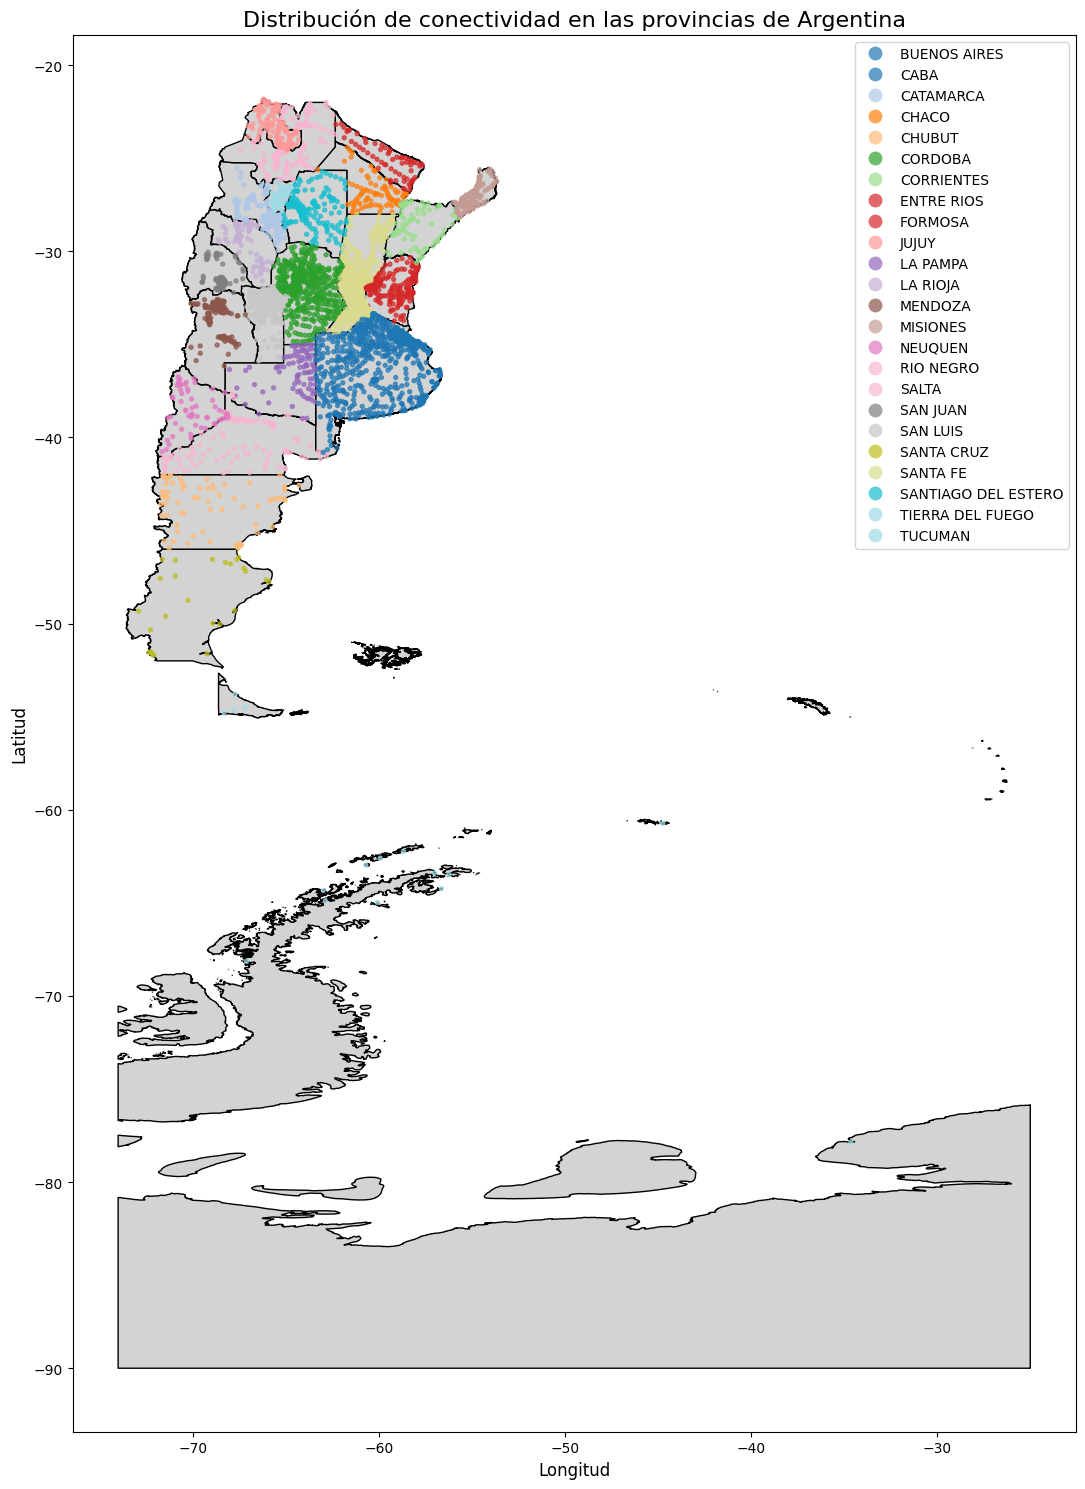

In [13]:
fig, ax = plt.subplots(figsize=(20, 15))
mapa_base.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, markersize=8, column='Provincia', cmap='tab20', legend=True, alpha=0.7)

plt.title('Distribución de conectividad en las provincias de Argentina', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.tight_layout()
plt.show()

## Representacion de la distribucion de tipos de conectividad a lo largo de las provincias de Argentia

En ella podemos observar la densidad que existe en relacion a las conectividades en Argentina.
Nos puede ayudar a darnos una idea visual de como poder actuar y tomar decisiones para tener una infraestructura nueva en zonas donde se puede considerar invertir en este tema y ampliar la conectividad de las regiones con menos densidad de conectividad en sus diferentes tipos.